In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

In [5]:
df_merged = pd.read_csv('D:\\Projo\\Projet-Data-IA\\Merged_all_tables\\merged_final.csv', sep=',')

In [6]:
# def clean_actors_list(actors_list):
#     # Convertir la liste en un ensemble pour supprimer les doublons, puis trier
#     unique_actors = sorted(set(actors_list))
#     # Convertir l'ensemble trié en une chaîne de caractères séparée par des virgules
#     cleaned_list = ', '.join(unique_actors)
#     return cleaned_list

# # Appliquer la fonction à chaque élément de la colonne "Actors_Actresses"
# df_merged['Actors_Actresses'] = df_merged['Actors_Actresses'].apply(eval).apply(clean_actors_list)
# df_merged['production_companies_name'] = df_merged['production_companies_name'].apply(eval).apply(clean_actors_list)

# Suppression des colonnes inutiles pour l'analyse
df_merged.drop(columns=['overview', 'poster_path', 'backdrop_path', 'nconst_director'], inplace=True)
df_merged.dropna(inplace=True)

df_merged.head(10)

,titleId,title,averageRating,numVotes,startYear,runtimeMinutes,genre1,genre2,popularity,production_companies_name,Director_name,Actors_Actresses
0,tt0035423,Kate et Léopold,6.4,88939.0,2001.0,118.0,Comedy,Fantasy,15.770,"Miramax, Konrad Pictures",James Mangold,"Bradley Whitford, Paxton Whitehead, Matthew Su..."
1,tt0054632,L'année dernière à Marienbad,7.7,24793.0,1961.0,94.0,Drama,Mystery,11.284,"Argos Films, Cineriz, Silver Films, Terra Film...",Alain Resnais,"Pierre Barbaud, Delphine Seyrig, Françoise Ber..."
2,tt0054692,Sous le ciel bleu d'Hawaï,6.1,7478.0,1961.0,102.0,Comedy,Musical,10.444,"Hal Wallis Productions, Paramount",Norman Taurog,"Howard McNear, Joan Blackman, Elvis Presley, A..."
3,tt0054698,Diamants sur canapé,7.6,191686.0,1961.0,115.0,Comedy,Drama,18.252,"Jurow-Shepherd, Paramount",Blake Edwards,"José Luis de Vilallonga, Dorothy Whitney, Mart..."
4,tt0054847,Le Cid,7.2,15632.0,1961.0,182.0,Biography,Drama,13.196,"Samuel Bronston Productions, Allied Artists Pi...",Anthony Mann,"Frank Thring, Michael Hordern, Gary Raymond, G..."
5,tt0054953,Les Canons de Navarone,7.5,55225.0,1961.0,158.0,Action,Adventure,15.708,"Columbia Pictures, Highroad Productions",J. Lee Thompson,"David Niven, Anthony Quinn, Stanley Baker, Ant..."
6,tt0054997,L'Arnaqueur,8.0,86655.0,1961.0,134.0,Drama,Sport,12.066,"Rossen Films, 20th Century Fox",Robert Rossen,"Jackie Gleason, Michael Constantine, Paul Newm..."
7,tt0055031,Jugement à Nuremberg,8.3,85083.0,1961.0,179.0,Drama,War,13.877,"United Artists, Roxlom Films",Stanley Kramer,"Maximilian Schell, Montgomery Clift, Spencer T..."
8,tt0055047,Le roi des rois,7.0,8974.0,1961.0,168.0,Biography,Drama,12.283,"Samuel Bronston Productions, Metro-Goldwyn-Mayer",Nicholas Ray,"Siobhan McKenna, Viveca Lindfors, Hurd Hatfiel..."
9,tt0055184,Les désaxés,7.2,23321.0,1961.0,125.0,Drama,Romance,13.136,"Metro-Goldwyn-Mayer, United Artists, Seven Art...",John Huston,"Eli Wallach, Montgomery Clift, Rex Bell, Kevin..."


In [7]:
df_merged['genre1'].value_counts()

genre1
Action         1450
Drama          1130
Comedy         1027
Crime           441
Biography       417
Adventure       400
Horror          179
Animation        37
Mystery          20
Fantasy          19
Thriller          7
Documentary       7
Western           4
Family            3
Sci-Fi            2
Romance           1
Music             1
History           1
Name: count, dtype: int64

In [8]:
df_merged.dtypes


titleId                       object
title                         object
averageRating                float64
numVotes                     float64
startYear                    float64
runtimeMinutes               float64
genre1                        object
genre2                        object
popularity                   float64
production_companies_name     object
Director_name                 object
Actors_Actresses              object
dtype: object

In [9]:
df_merged.describe()

,averageRating,numVotes,startYear,runtimeMinutes,popularity
count,5146.000000,5.146000e+03,5146.000000,5146.000000,5146.000000
mean,6.911757,1.352459e+05,2004.119705,114.215896,28.589045
std,0.601120,2.188546e+05,15.000591,19.565688,121.237880
min,6.000000,5.026000e+03,1961.000000,85.000000,10.000000
25%,6.400000,2.272500e+04,1995.000000,100.000000,12.165750
50%,6.800000,5.994200e+04,2008.000000,111.000000,15.754500
75%,7.300000,1.537830e+05,2016.000000,124.000000,24.043000
max,9.300000,2.878611e+06,2024.000000,238.000000,5089.969000


In [10]:
# Les 20 films les mieux notés de 1980 à 2024

df_sorted_avg =  df_merged.sort_values(by='averageRating', ascending=False)
df_sorted_avg.head()

,titleId,title,averageRating,numVotes,startYear,runtimeMinutes,genre1,genre2,popularity,production_companies_name,Director_name,Actors_Actresses
1225,tt0111161,Les évadés,9.3,2878611.0,1994.0,142.0,Drama,Drama,84.139,Castle Rock Entertainment,Frank Darabont,"Mark Rolston, James Whitmore, Larry Brandenbur..."
233,tt0068646,Le Parrain,9.2,2004826.0,1972.0,175.0,Crime,Drama,113.216,"Alfran Productions, Paramount",Francis Ford Coppola,"Robert Duvall, Richard Conte, Al Pacino, James..."
2475,tt0468569,The Dark Knight : Le Chevalier noir,9.0,2861067.0,2008.0,152.0,Action,Crime,81.582,"DC Comics, Isobel Griffiths, Syncopy, Warner B...",Christopher Nolan,"Cillian Murphy, Morgan Freeman, Gary Oldman, M..."
1667,tt0167260,Le Seigneur des anneaux : Le Retour du roi,9.0,1972573.0,2003.0,201.0,Action,Adventure,65.571,"New Line Cinema, WingNut Films, The Saul Zaent...",Peter Jackson,"Ian McKellen, Sean Astin, Ali Astin, Elijah Wo..."
284,tt0071562,"Le Parrain, 2ᵉ partie",9.0,1359986.0,1974.0,202.0,Crime,Drama,55.942,"The Coppola Company, Paramount",Francis Ford Coppola,"Robert Duvall, Talia Shire, Michael V. Gazzo, ..."


In [11]:
# Moyenne durée des 20 films les mieux notés
df_mean_avg = df_sorted_avg['runtimeMinutes'].head(20).mean()
df_mean_avg.round()

161.0

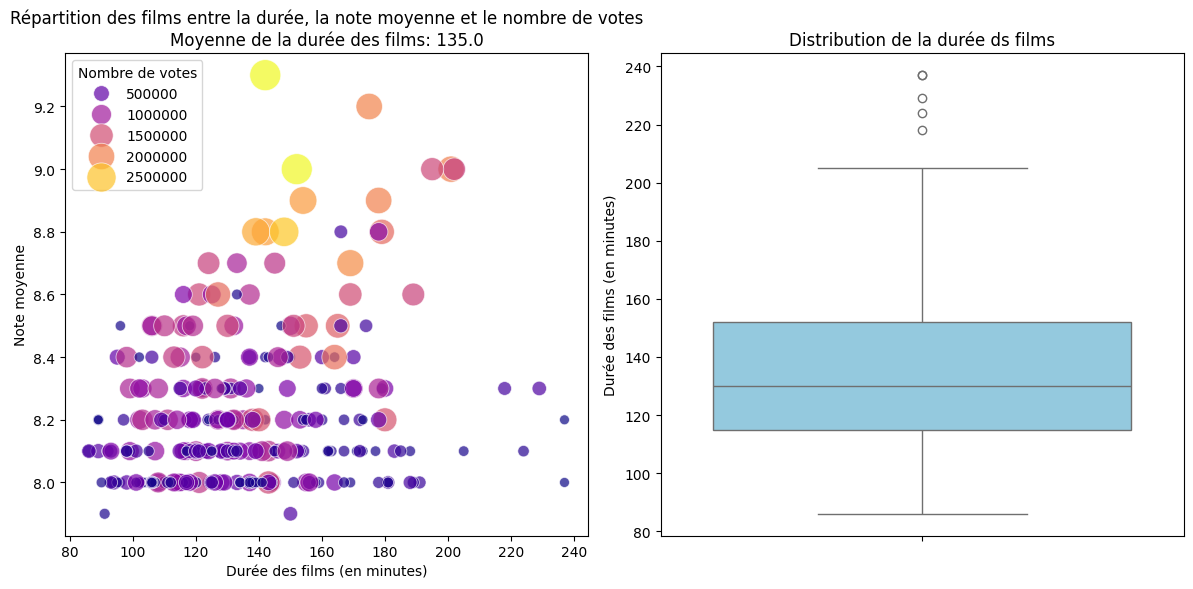

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Les n premiers films les mieux notés
df_top_20 = df_sorted_avg.sort_values(by='averageRating', ascending=False).head(300)

# Nuage de points avec 'runtimeMinutes' sur l'axe x, 'averageRating' sur l'axe y et 'numVotes' comme taille des points
sns.scatterplot(data=df_top_20, x='runtimeMinutes', y='averageRating', hue='numVotes', palette='plasma', size='numVotes', sizes=(50, 500), alpha=0.7, ax=axes[0])

# Barre de couleur pour expliquer la signification des couleurs
axes[0].legend(title='Nombre de votes', loc='upper left')

axes[0].set_xlabel('Durée des films (en minutes)')
axes[0].set_ylabel('Note moyenne')
axes[0].set_title(f'Répartition des films entre la durée, la note moyenne et le nombre de votes\nMoyenne de la durée des films: {df_top_20["runtimeMinutes"].mean().round()}')

# Graphique boxplot pour 'runtimeMinutes'
sns.boxplot(data=df_top_20, y='runtimeMinutes', ax=axes[1], color='skyblue')

# Ajouter des labels et un titre
axes[1].set_ylabel('Durée des films (en minutes)')
axes[1].set_title('Distribution de la durée ds films')


plt.tight_layout()
plt.show()



* On peut voir que la majorité des films de 500 000 à 1 000 000 de nombres de votes se situe entre 110 Minutes et 140 Minutes

In [13]:
# Top 20 des films les plus votés
df_sorted_numVotes =  df_merged.sort_values(by='numVotes', ascending=False)
df_sorted_numVotes.head()

,titleId,title,averageRating,numVotes,startYear,runtimeMinutes,genre1,genre2,popularity,production_companies_name,Director_name,Actors_Actresses
1225,tt0111161,Les évadés,9.3,2878611.0,1994.0,142.0,Drama,Drama,84.139,Castle Rock Entertainment,Frank Darabont,"Mark Rolston, James Whitmore, Larry Brandenbur..."
2475,tt0468569,The Dark Knight : Le Chevalier noir,9.0,2861067.0,2008.0,152.0,Action,Crime,81.582,"DC Comics, Isobel Griffiths, Syncopy, Warner B...",Christopher Nolan,"Cillian Murphy, Morgan Freeman, Gary Oldman, M..."
3288,tt1375666,Inception,8.8,2541819.0,2010.0,148.0,Action,Adventure,77.103,"Syncopy, Warner Bros. Pictures, Legendary Pict...",Christopher Nolan,"Elliot Page, Pete Postlethwaite, Leonardo DiCa..."
1593,tt0137523,Fight Club,8.8,2314328.0,1999.0,139.0,Drama,Drama,58.660,"Atman Entertainment, Regency Enterprises, Fox ...",David Fincher,"Richmond Arquette, Meat Loaf, George Maguire, ..."
1189,tt0109830,Forrest Gump,8.8,2248303.0,1994.0,142.0,Drama,Romance,52.321,"The Steve Tisch Company, Wendy Finerman Produc...",Robert Zemeckis,"John Randall, Harold G. Herthum, Robin Wright,..."


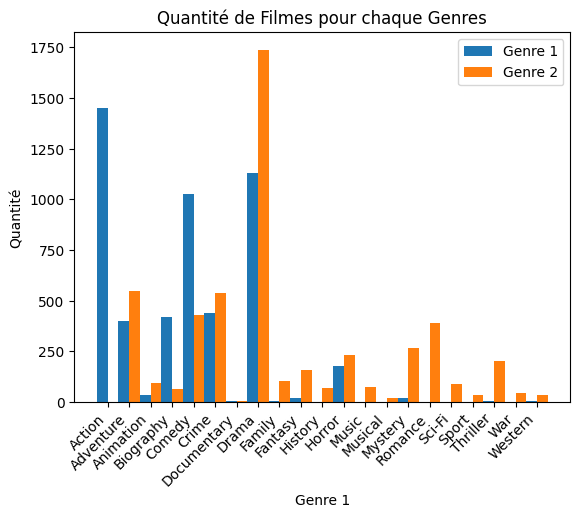

In [14]:
genero1_counts = df_merged['genre1'].value_counts()
genero2_counts = df_merged['genre2'].value_counts()

#Combinando os índices de ambas as séries para garantir que todos os gêneros estejam presentes
index = genero1_counts.index.union(genero2_counts.index)

#Preenchendo os valores ausentes com 0
genero1_counts = genero1_counts.reindex(index, fill_value=0)
genero2_counts = genero2_counts.reindex(index, fill_value=0)

#Plotando o gráfico de barras
fig, ax = plt.subplots()

#Configurando a largura das barras
bar_width = 0.5

#Calculando a posição das barras
x = range(len(index))

#Plotando as barras para Genero1
bars1 = ax.bar(x, genero1_counts.values, bar_width, label='Genre 1')

#Plotando as barras para Genero2 com um deslocamento de bar_width
bars2 = ax.bar([i + bar_width for i in x], genero2_counts.values, bar_width, label='Genre 2')

#Configurando os rótulos e ticks do eixo x
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(index, rotation=45, ha='right')

#Adicionando legendas e rótulos de eixo
ax.legend()
ax.set_xlabel('Genre 1')
ax.set_ylabel('Quantité')
ax.set_title('Quantité de Filmes pour chaque Genres')

plt.show()


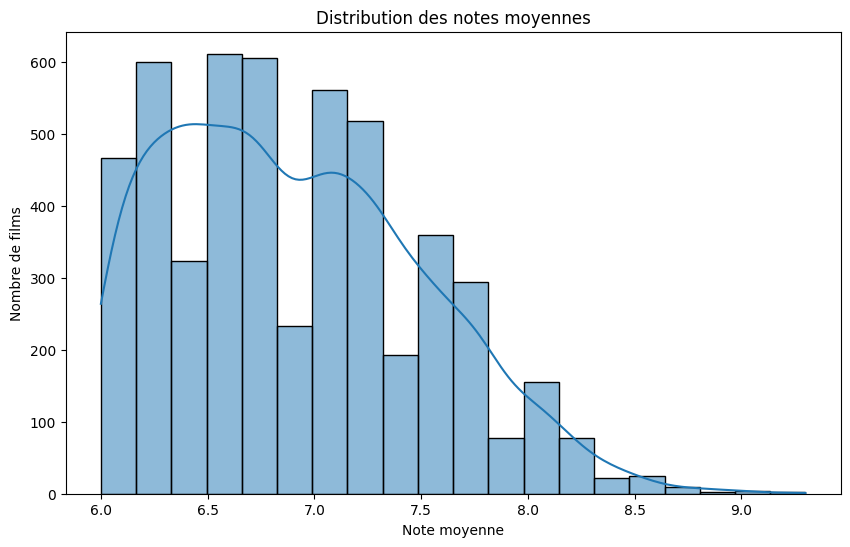

In [15]:
# Moyenne des notes
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['averageRating'], bins=20, kde=True)
plt.title('Distribution des notes moyennes')
plt.xlabel('Note moyenne')
plt.ylabel('Nombre de films')
plt.show()


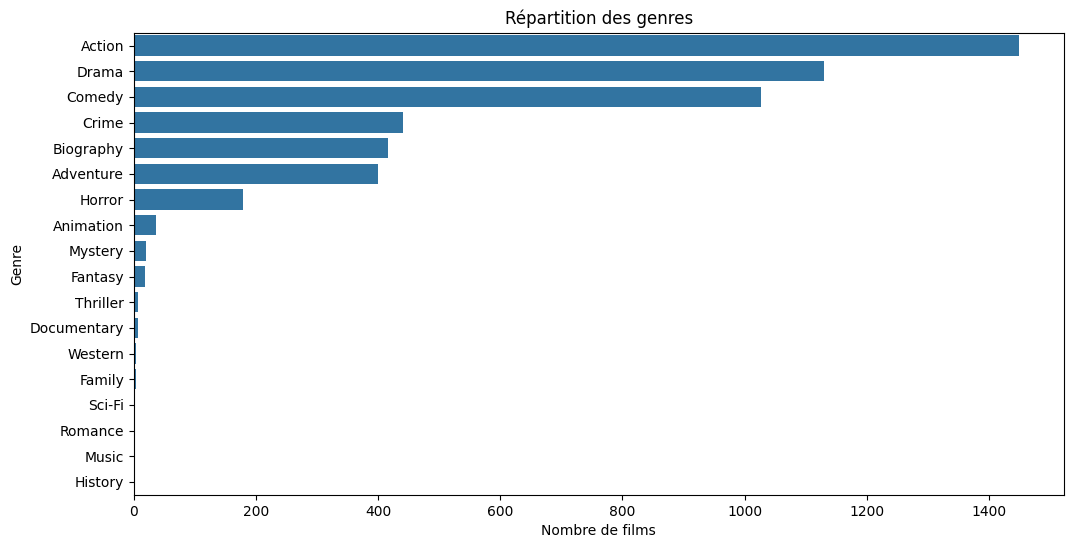

In [16]:
# Diagramme en barres pour les genres
plt.figure(figsize=(12, 6))
sns.countplot(y=df_merged['genre1'], order = df_merged['genre1'].value_counts().index)
plt.title('Répartition des genres')
plt.xlabel('Nombre de films')
plt.ylabel('Genre')
plt.show()


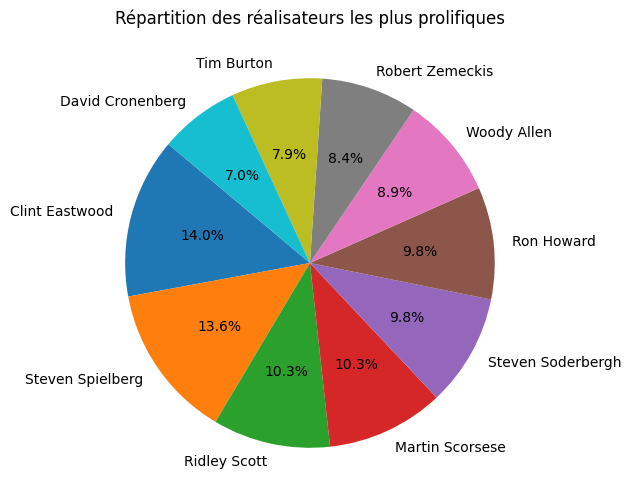

In [17]:
# les réalisateurs les plus sollicités
# Ajouter les années
# faire un graphique des meilleures réalisateurs par films a succés
top_directors = df_merged['Director_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.pie(top_directors, labels=top_directors.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des réalisateurs les plus prolifiques')
plt.show()

In [18]:
# Les acteurs et actrices les plus sollicités

# Diviser les noms des acteurs et actrices dans une liste
df_merged['Actors_Actresses'] = df_merged['Actors_Actresses'].str.split(',')

# Utiliser explode pour transformer la liste en une série avec une entrée pour chaque nom
df_actors = df_merged.explode('Actors_Actresses')

# Compter le nombre d'occurrences de chaque acteur/actrice
count_actors = df_actors['Actors_Actresses'].value_counts()

count_actors.head(10)


Actors_Actresses
Robert De Niro       52
Samuel L. Jackson    46
Morgan Freeman       40
Liam Neeson          39
Meryl Streep         39
Willem Dafoe         39
Brad Pitt            39
Tom Cruise           38
Mark Wahlberg        38
Nicolas Cage         38
Name: count, dtype: int64

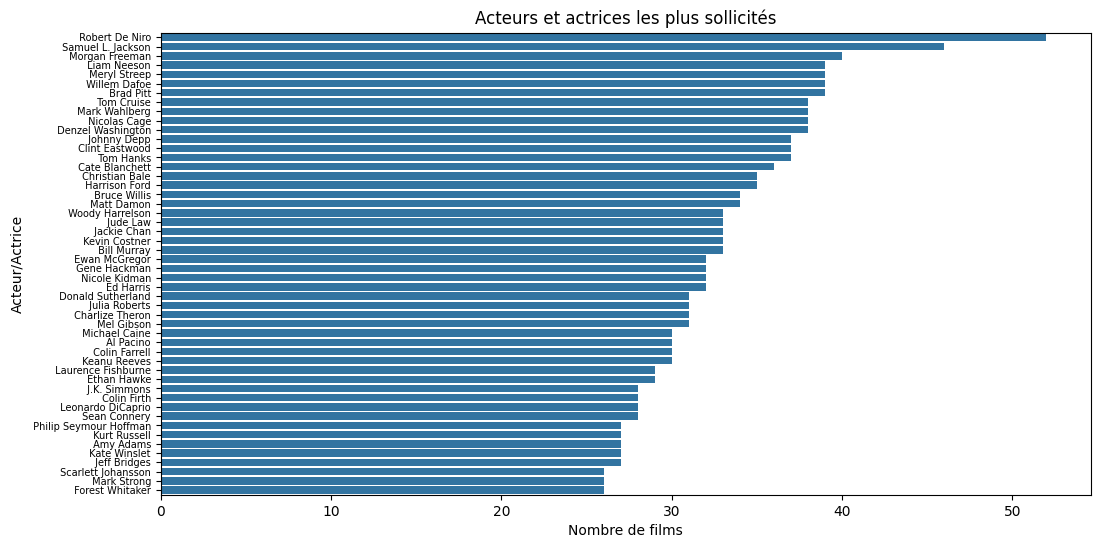

In [19]:
# Diagramme en barres pour les acteurs les plus sollicités
plt.figure(figsize=(12, 6))
sns.barplot(x=count_actors.head(50).values, y=count_actors.head(50).index)
plt.title('Acteurs et actrices les plus sollicités')
plt.xlabel('Nombre de films')
plt.ylabel('Acteur/Actrice')
plt.tick_params(axis='y', labelsize=7)
plt.show()


# TRIER LES ACTEURS PAR NOMBRE DE FILMS LES PLUS SOLICITES ET LES ANNÉES DE LEURS FILMS



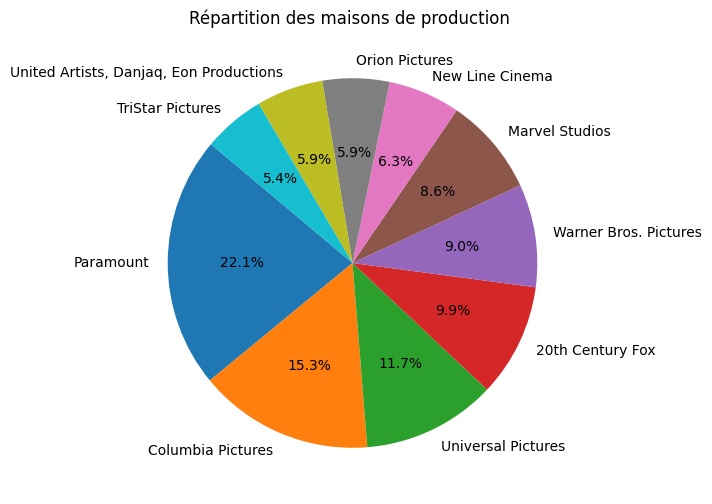

In [20]:
# Compagnies de production les plus populaires
# les réalisateurs les plus sollicités
# Ajouter les années
# faire un graphique des meilleures réalisateurs par films a succés
top_directors = df_merged['production_companies_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.pie(top_directors, labels=top_directors.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des maisons de production ')
plt.show()


In [21]:
# Nombres de films pa année de sortie de  film

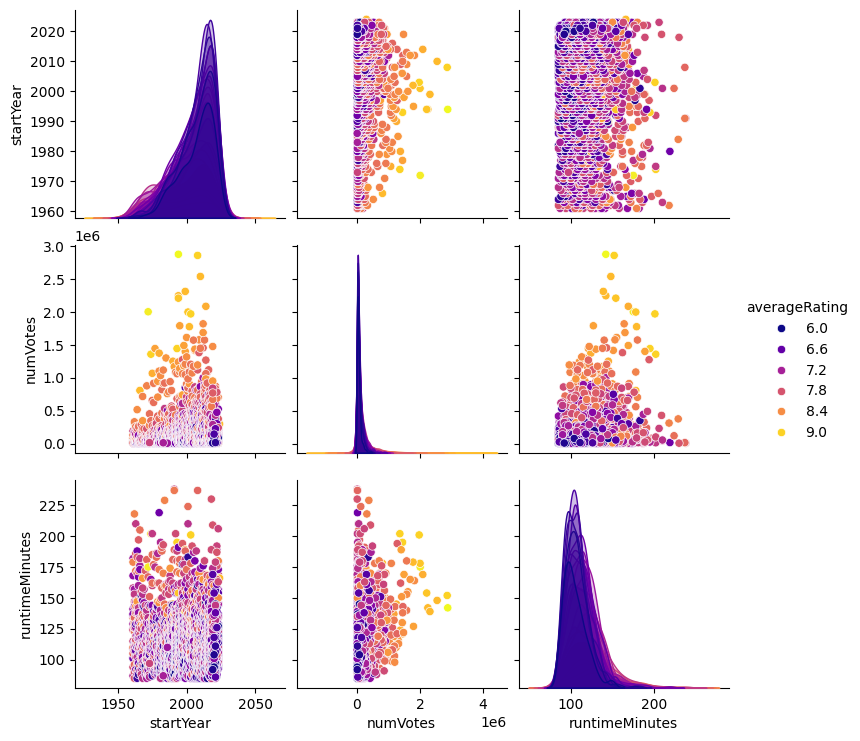

In [22]:
sns.pairplot(df_merged[['startYear', 'numVotes', 'averageRating', 'runtimeMinutes']], hue='averageRating', palette='plasma')

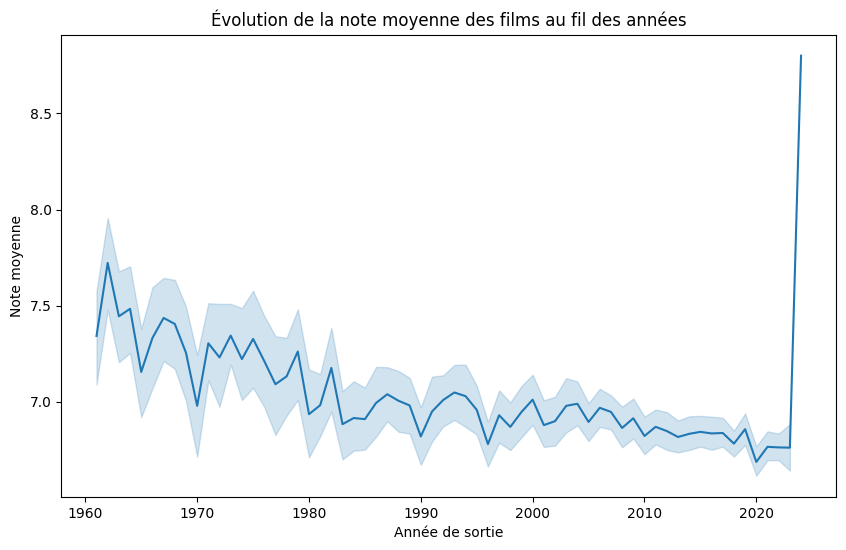

In [23]:
# Moyenne des notes par année
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_merged, x='startYear', y='averageRating')
plt.title('Évolution de la note moyenne des films au fil des années')
plt.xlabel('Année de sortie')
plt.ylabel('Note moyenne')
plt.show()